In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
X=data.data
y=data.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [ ]:
L.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [ ]:
y_pred=L.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.1)

In [ ]:
R.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
print(R.coef_)
print(R.intercept_)

[  31.03389163 -204.8305909   464.8963454   304.96414918  -95.76037039
  -87.52969228 -183.81809293  147.49794012  425.85392451  110.21559915]
152.07141290172817


In [ ]:
y_pred1=R.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5208421054129915
RMSE 48.62420568515607


In [37]:
# hyperparamter tuning

from sklearn.linear_model import RidgeCV
import numpy as np

# 1. Define the list of alphas you want to check
# It is good practice to test a wide range (small decimals to large integers)
alphas_to_test = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]

# 2. Initialize RidgeCV
# cv=5 means it splits your training data into 5 parts to validate each alpha thoroughly
model = RidgeCV(alphas=alphas_to_test, scoring='r2', cv=5)

# 3. Fit the model (It runs the tests in the background)
model.fit(X_train, y_train)

# 4. See the results
print(f"The best alpha value was: {model.alpha_}")
print(f"The best R2 score achieved: {model.best_score_}")   # internal split and predict and gives maximum score

# 5. You can now use 'model' directly to predict, it automatically uses the best alpha
y_pred2 = model.predict(X_test)
print("R2 score",r2_score(y_test,y_pred2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

The best alpha value was: 0.1
The best R2 score achieved: 0.4553741083414146
R2 score 0.5208421054129915
RMSE 48.62420568515607


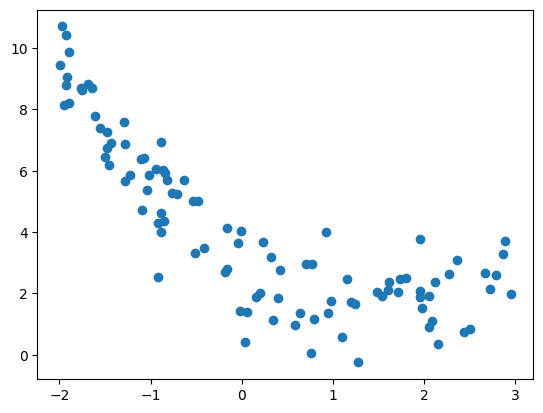

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.8827e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.8827e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


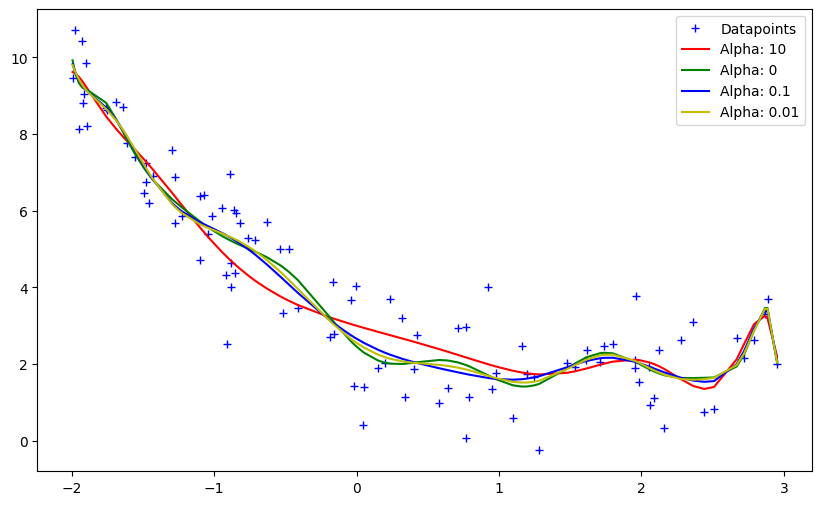

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [10, 0, 0.1, 0.01]
cs = ['r', 'g', 'b','y']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()